In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import warnings
warnings.filterwarnings('ignore')

# Part-I: GDP Analysis of the Indian States

In [67]:
gdp_df = pd.read_csv('./data/ab40c054-5031-4376-b52e-9813e776f65e.csv', index_col = None, header = 0)

ut_list = ['Andaman & Nicobar Islands', 'Chandigarh', 'Delhi', 'Puducherry']

#dropping union territories
gdp_df = gdp_df.drop(ut_list, axis = 1)

In [68]:
#filtering only '% Growth over previous year' rows
percent_growth_df = gdp_df[gdp_df['Items  Description'] == '(% Growth over previous year)']

In [69]:
# percentage of null values in each column
100 * (percent_growth_df.isnull().sum() / len(percent_growth_df.index))

Items  Description      0.0
Duration                0.0
Andhra Pradesh          0.0
Arunachal Pradesh      20.0
Assam                  20.0
Bihar                  20.0
Chhattisgarh            0.0
Goa                    20.0
Gujarat                20.0
Haryana                 0.0
Himachal Pradesh       40.0
Jammu & Kashmir        20.0
Jharkhand              20.0
Karnataka              20.0
Kerala                 20.0
Madhya Pradesh          0.0
Maharashtra            40.0
Manipur                40.0
Meghalaya               0.0
Mizoram                40.0
Nagaland               40.0
Odisha                  0.0
Punjab                 40.0
Rajasthan              40.0
Sikkim                 20.0
Tamil Nadu              0.0
Telangana               0.0
Tripura                40.0
Uttar Pradesh          20.0
Uttarakhand            20.0
West Bengal1          100.0
All_India GDP           0.0
dtype: float64

In [70]:
#dropping Item Description column as it is not required for analysis
percent_growth_df = percent_growth_df.drop('Items  Description', axis = 1)

#dropping all the coulmns which have 100 % null value (West Bengal column as the column contains 100% null values)
#I am keeping rest of the null values present in any other column
percent_growth_df = percent_growth_df.drop(percent_growth_df.columns[percent_growth_df.isnull().all()], axis = 1)

#removing leading and trailing space from the column header(if any)
percent_growth_df.columns = percent_growth_df.columns.map(lambda x: x.strip())

## Part I-A

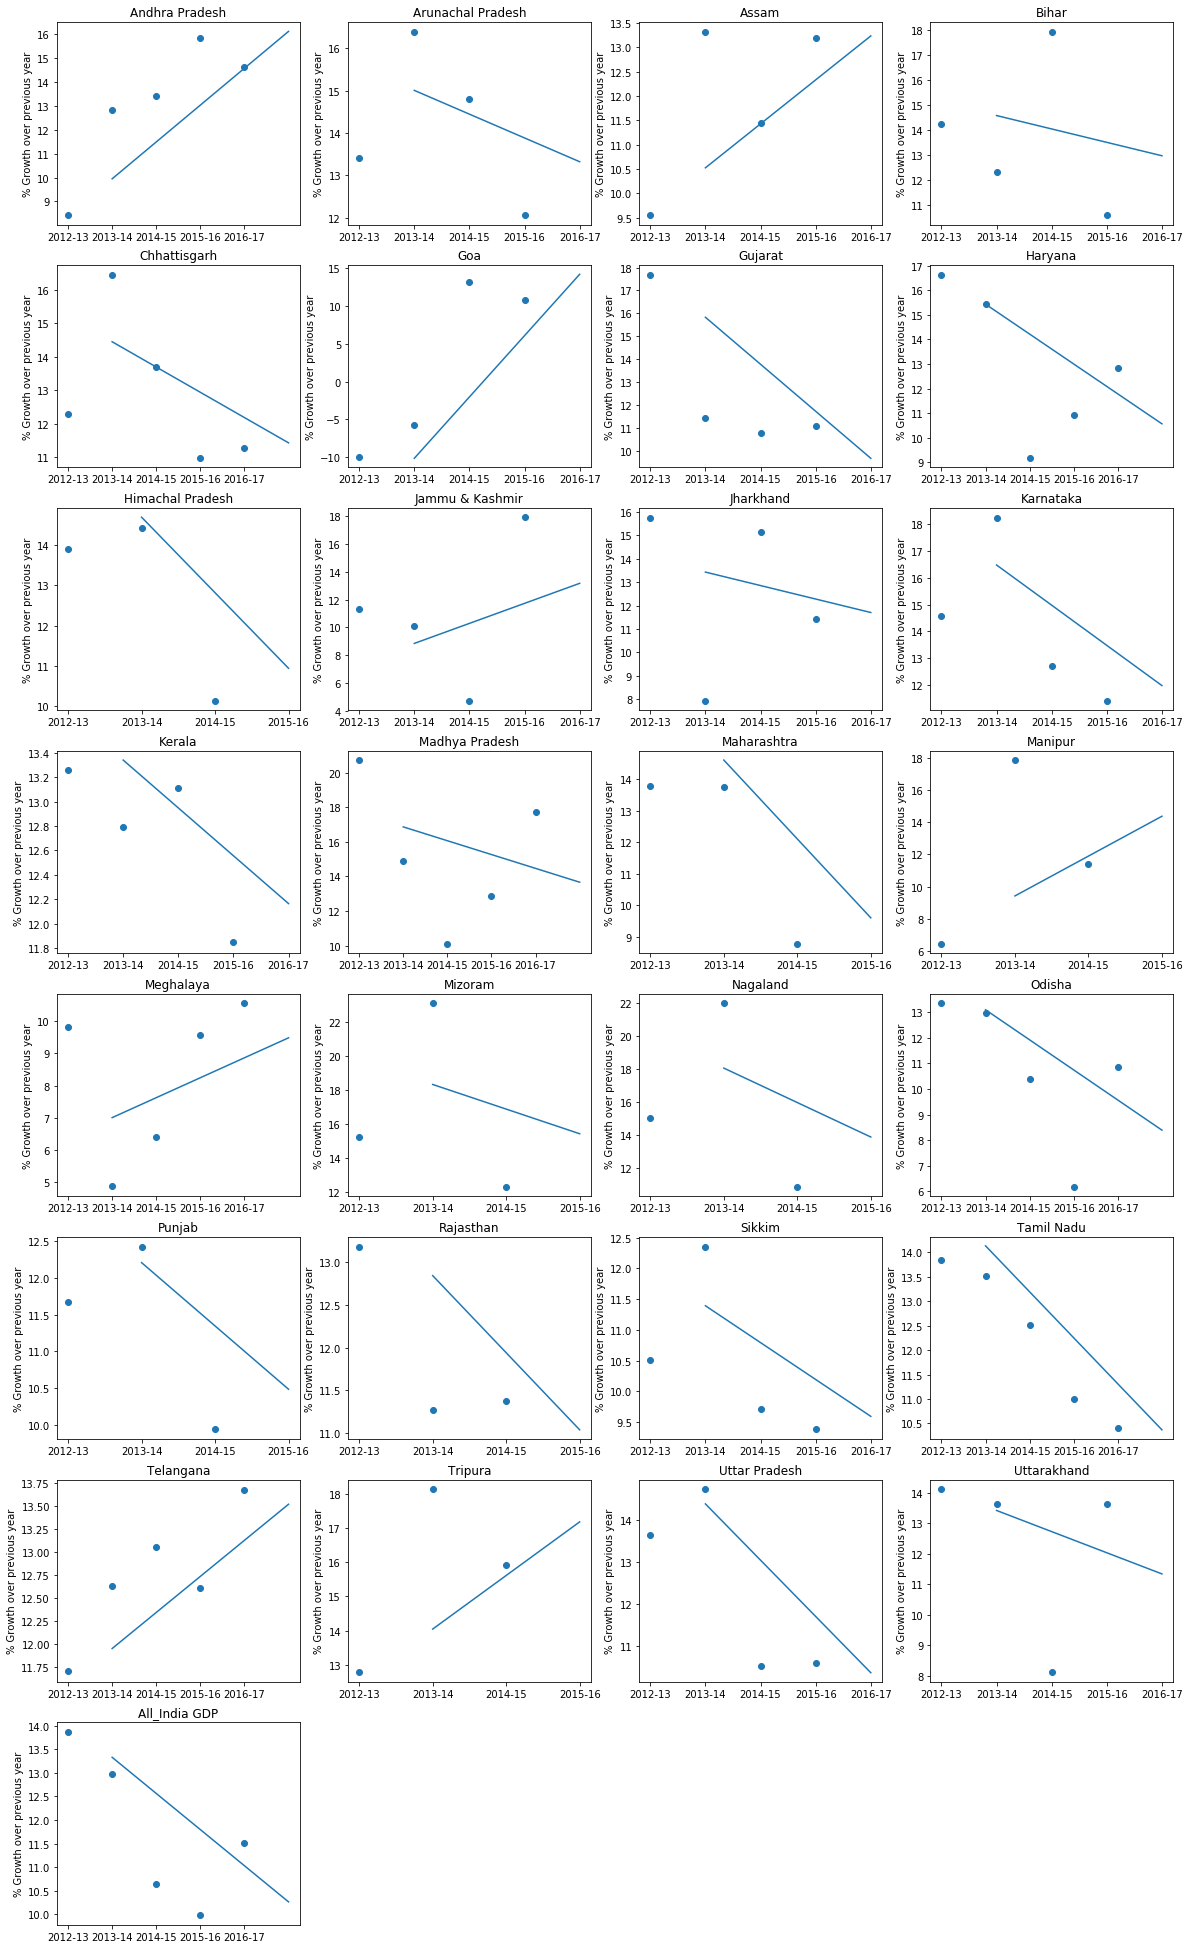

In [71]:
#plotting the best fit line for all the state and nation
plt.figure(figsize = (20,35))
slope_list = []
for i in range(1, len(percent_growth_df.columns)):
    col_name = percent_growth_df.columns[i]
    col_len = percent_growth_df[col_name].count()
    
    #createing dataframe with 'Sl' column and individual State
    sl = pd.DataFrame(np.arange(1, col_len + 1), columns = ['Sl'])
    state = pd.DataFrame(percent_growth_df[col_name].dropna()).reset_index()
    state = state.drop('index', axis = 1) #dropping index columns after reset_index()
    
    dat = pd.concat([sl,state], axis = 1)
    
    #slope = m , y intersector = c
    m, c = np.polyfit(dat['Sl'], dat[col_name], 1)
    slope_list.append([col_name, round(m,2)])
    plt.subplot(8, 4, i)
    plt.scatter(x = percent_growth_df['Duration'], y = col_name, data = percent_growth_df)
    plt.plot(dat['Sl'], m * dat['Sl'] + c)
    plt.title(col_name)
    #plt.xlabel('Year 2012 - 2017')
    plt.ylabel('% Growth over previous year')
plt.show()

In [72]:
#createing pandas dataframe with best fir line slope and State name
state_slope = pd.DataFrame(slope_list, columns=['State', 'Slope'])
state_slope = state_slope.sort_values(by='Slope', ascending=False)

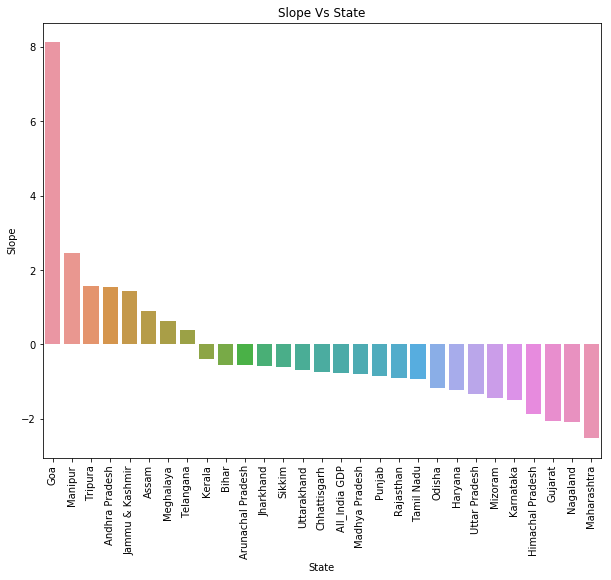

In [73]:
#plotting the Slope Vs State bar chart
plt.figure(figsize=(10,8))
sns.barplot(x='State', y='Slope', data=state_slope)
plt.xticks(rotation = 90)
plt.title('Slope Vs State')
plt.show()

#### How will you compare the growth rates of any two states?
By seeing the above best fit lines and this above bar plot of the slope of the best fit lines, we can compare the growth rate of any 2 states

In [74]:
#getting the details of the different states to compare the growth rate
details = percent_growth_df.describe().T
details

,count,mean,std,min,25%,50%,75%,max
Andhra Pradesh,5.0,13.036000,2.824266,8.43,12.8500,13.400,14.6500,15.85
Arunachal Pradesh,4.0,14.162500,1.848952,12.07,13.0750,14.100,15.1875,16.38
Assam,4.0,11.877500,1.763356,9.56,10.9775,12.320,13.2200,13.31
Bihar,4.0,13.765000,3.147809,10.59,11.8725,13.275,15.1675,17.92
Chhattisgarh,5.0,12.934000,2.229682,10.98,11.2600,12.300,13.6900,16.44
Goa,4.0,2.020000,11.619934,-10.02,-6.8325,2.490,11.3425,13.12
Gujarat,4.0,12.767500,3.292480,10.82,11.0225,11.280,13.0250,17.69
Haryana,5.0,12.998000,3.089186,9.18,10.9100,12.820,15.4500,16.63
Himachal Pradesh,3.0,12.816667,2.333160,10.14,12.0150,13.890,14.1550,14.42
Jammu & Kashmir,4.0,11.002500,5.427162,4.70,8.7425,10.700,12.9600,17.91


In [75]:
#sorting details dataframe based on avegare in descending order
details = details.sort_values(by='mean', ascending = False)

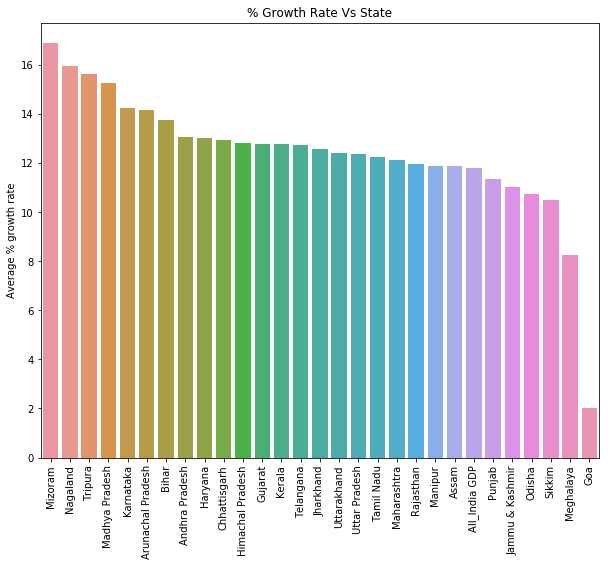

In [76]:
plt.figure(figsize = (10,8))
sns.barplot(x = details.index, y = 'mean', data = details)
plt.ylabel('Average % growth rate')
plt.xticks(rotation = 90)
plt.title('% Growth Rate Vs State')
plt.show()

#### Which states have been growing consistently fast, and which ones have been struggling? 
`Mizoram, Nagaland and Tripura` have average growth rate is high and `Sikkim, Meghalaya and Goa` have average growth rate low. From the Slope, we can see that Goa, Manipur, Tripura are growing fast and Assam, Meghalaya, Telanga is growing slower.
#### Rank top 3 fastest and 3 slowest-growing states? What is the Nation's growth rate? 
`11.8`
#### What has been the growth rate of your home state, and how does it compare to the national growth rate?
My home state is Karnataka. Its avegare growth rate is 14.23. The growth rate is better than the nation's average growth rate

### Total GDP of the states of the year 2015-16

In [77]:
#Getting the sub set of the data for the duration 2015-16
gdp_1516 = gdp_df[(gdp_df['Duration'] == '2015-16') & (gdp_df['Items  Description'] == r'GSDP - CURRENT PRICES (` in Crore)')]

gdp_1516.set_index('Duration', inplace = True)

gdp_1516 = gdp_1516.drop(['Items  Description', 'All_India GDP'], axis = 1)
gdp_1516 = gdp_1516.T
#adding state column as a categorical column
gdp_1516['State'] = gdp_1516.index
gdp_1516 = gdp_1516.sort_values(by='2015-16')

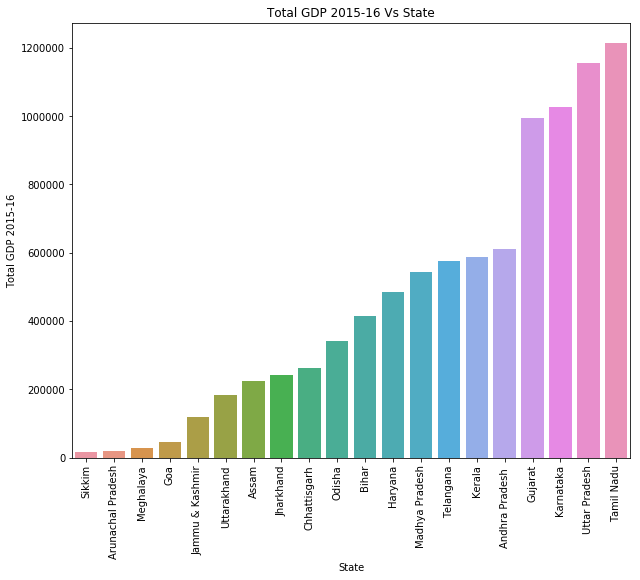

In [78]:
plt.figure(figsize =(10,8))
sns.barplot(x = 'State', y = '2015-16', data= gdp_1516.dropna())
plt.xticks(rotation = 90)
plt.ylabel('Total GDP 2015-16')
plt.title('Total GDP 2015-16 Vs State')
plt.show()

#### Which Plot will you use for this? Why? 
I have used barplot to plot the total GDP of each state as I have to plot the single variable in y axis and categorical variable in x axis.

#### Identify the top 5 and the bottom 5 states based on total GDP
* `Top 5:`
Tamil Nadu, Uttar Pradesh, Karnataka, Gujarat, Andhra Pradesh
* `Bottom 5:`
Sikkim, Arunachal Pradesh, Meghalaya, Goa, Jammu & Kashmir

#### What insights can you draw from this graph? What states are performing poorly?
Mainly north east states and Goa are performing poorly. Only 4 states are above 1000000 total GDP. Most of the state has GDP between 20000 to 600000. Mostly south Indian states are doing good except Gujarat which is from west. Madhya Pradesh stands in middle in terms of total GDP.

## Part I-B

In [79]:
path = './data/GSVA'
all_files = glob.glob(path + '/*.csv')

In [80]:
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col = None, header = 0, encoding = 'unicode_escape')
    df = df[['Item', '2014-15']]
    df = df.set_index('Item')
    df = df.T
    #df.loc[:, 'State'] = filename.split('-')[1]
    df.loc[:, 'State'] = " ".join(filename.split('-')[1].split('_'))
    li.append(df)

In [81]:
gsva_df = pd.concat(li, axis = 0, ignore_index = True)

##### Filtering the union territories

In [82]:
gsva_df = gsva_df[gsva_df['State'] != 'Delhi']
gsva_df = gsva_df[gsva_df['State'] != 'Puducherry']
gsva_df = gsva_df[gsva_df['State'] != 'Chandigarh']

In [83]:
gdp_percapita = gsva_df[['State', 'Per Capita GSDP (Rs.)']]
gdp_percapita = gdp_percapita.sort_values(by = 'Per Capita GSDP (Rs.)')
gdp_percapita.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 3 to 7
Data columns (total 2 columns):
State                    27 non-null object
Per Capita GSDP (Rs.)    27 non-null float64
dtypes: float64(1), object(1)
memory usage: 540.0+ bytes


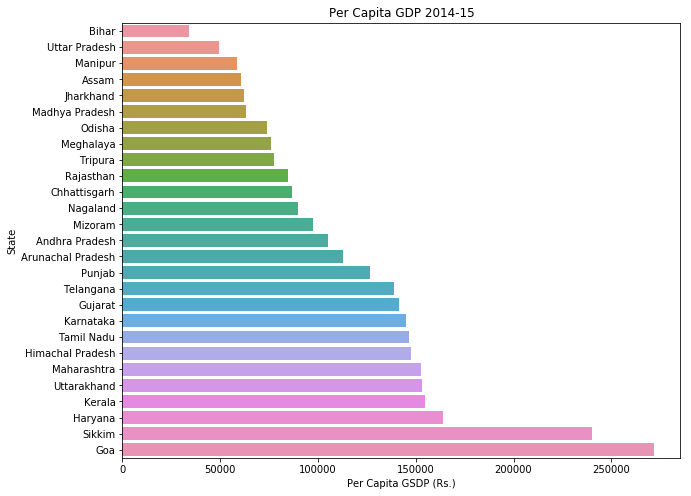

In [84]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'Per Capita GSDP (Rs.)', y = 'State', data = gdp_percapita)
plt.title('Per Capita GDP 2014-15')
plt.show()

In [85]:
lowest_percapita = list(gdp_percapita[:1]['Per Capita GSDP (Rs.)'])
print(lowest_percapita)
highest_percapita = list(gdp_percapita[-1:]['Per Capita GSDP (Rs.)'])
print(highest_percapita)
round(highest_percapita[0] / lowest_percapita[0], 2)

[33954.0]
[271793.0]


8.0

#### Identify the top 5 and the bottom 5 states based on the GDP per capita.
* `Top 5 State based on per capita GDP`
Goa, Sikkim, Haryana, Kerala, Uttarakhand
* `Bottom 5 State based on per capita GDP`
Bihar, Uttar Pradesh, Manipur, Assam, Jharkhand

#### Find the ratio of the highest per capita GDP to the lowest per capita GDP.
`8.0`

In [86]:
gsva_df['% Primary'] = round(100*(gsva_df['Primary']/ gsva_df['Gross State Domestic Product']), 2)
gsva_df['% Secondary'] = round(100*(gsva_df['Secondary']/ gsva_df['Gross State Domestic Product']), 2)
gsva_df['% Tertiary'] = round(100*(gsva_df['Tertiary']/ gsva_df['Gross State Domestic Product']), 2)
gsva_df.head()

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Population ('00),Per Capita GSDP (Rs.),State,Services incidental to transport*,Trade & repair services*,Road transport**,Road transport*,% Primary,% Secondary,% Tertiary
0,14819416.0,7893514.0,4309078.0,346160.0,2270664.0,1484300.0,16303716.0,4672266.0,1151729.0,4664889.0,...,501510.0,104977.0,Andhra Pradesh,NaN,NaN,NaN,NaN,30.97,19.92,41.85
1,686117.0,415520.0,38387.0,224017.0,8193.0,30842.0,716959.0,26120.0,113527.0,147842.0,...,14870.0,112718.0,Arunachal Pradesh,NaN,NaN,NaN,NaN,42.77,17.15,37.70
2,3855548.0,2890544.0,173478.0,261987.0,529539.0,1471149.0,5326697.0,2002936.0,296587.0,1733568.0,...,326780.0,60621.0,Assam,NaN,NaN,NaN,NaN,26.89,20.36,46.98
3,7951890.0,4688237.0,2060296.0,550132.0,653224.0,68107.0,8019997.0,2189965.0,345168.0,3449763.0,...,1101240.0,33954.0,Bihar,NaN,NaN,NaN,NaN,21.45,16.01,59.32
5,3948847.0,2613371.0,352208.0,597785.0,385483.0,2451970.0,6400817.0,4370593.0,1198438.0,2669855.0,...,270530.0,86860.0,Chhattisgarh,NaN,NaN,NaN,NaN,27.24,35.06,32.30


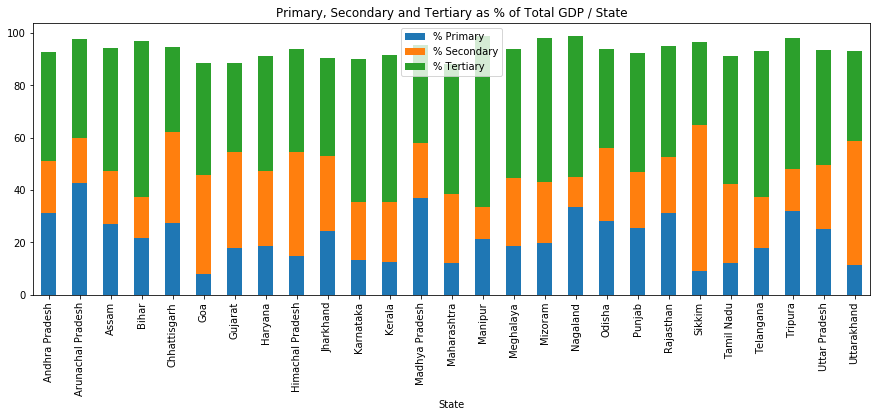

In [87]:
groupby_state = gsva_df.groupby('State')['% Primary', '% Secondary', '% Tertiary'].mean()
#groupby_state.plot(kind='bar', figsize=(15, 5))
groupby_state.plot(kind='bar', stacked=True, figsize=(15, 5))
plt.title('Primary, Secondary and Tertiary as % of Total GDP / State')
plt.show()

#### Which plot will you use here? Why?
I have used stacked bar plot to visualize the precentage of the total GDP for each state as the sum of these there sectors should sum up to total GDP. So if these are stacked then it will be helpful to visualize in the each bar of the bar plot.

#### Why is (Primary + Secondary + Tertiary) not equal to total GDP?
`Total GSDP = Primary + Secondary + Tertiary + Taxes on Products - Subsidies on products`
The summation of these 3 sectors are not equal to the total GDP as Govt. pays taxes on the products which should be included to calculate the total GDP

#### Can you draw any insight from this?
* Andhra Pradesh, Arunachal Pradesh, Madhya Pradesh, Nagalad, Rajasthan, Tripura's primary sector has good proportion of contribution in total GDP
* Sikkim, Uttarakhand, Goa, Himachal Pradesh's secondary secor has good proportion of contribution in total GDP
* Most of the state's tritiary sector is doing good. Specially Maniput, Karnataka, Kerala, Nagaland, Bihar, Telangana

In [88]:
#createing the percetile rank columns on the Per Capita GSDP (Rs.) column
gsva_df['Pct_rank'] = gsva_df['Per Capita GSDP (Rs.)'].rank(pct=True)
gsva_df.head()

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Per Capita GSDP (Rs.),State,Services incidental to transport*,Trade & repair services*,Road transport**,Road transport*,% Primary,% Secondary,% Tertiary,Pct_rank
0,14819416.0,7893514.0,4309078.0,346160.0,2270664.0,1484300.0,16303716.0,4672266.0,1151729.0,4664889.0,...,104977.0,Andhra Pradesh,NaN,NaN,NaN,NaN,30.97,19.92,41.85,0.518519
1,686117.0,415520.0,38387.0,224017.0,8193.0,30842.0,716959.0,26120.0,113527.0,147842.0,...,112718.0,Arunachal Pradesh,NaN,NaN,NaN,NaN,42.77,17.15,37.70,0.555556
2,3855548.0,2890544.0,173478.0,261987.0,529539.0,1471149.0,5326697.0,2002936.0,296587.0,1733568.0,...,60621.0,Assam,NaN,NaN,NaN,NaN,26.89,20.36,46.98,0.148148
3,7951890.0,4688237.0,2060296.0,550132.0,653224.0,68107.0,8019997.0,2189965.0,345168.0,3449763.0,...,33954.0,Bihar,NaN,NaN,NaN,NaN,21.45,16.01,59.32,0.037037
5,3948847.0,2613371.0,352208.0,597785.0,385483.0,2451970.0,6400817.0,4370593.0,1198438.0,2669855.0,...,86860.0,Chhattisgarh,NaN,NaN,NaN,NaN,27.24,35.06,32.30,0.407407


In [89]:
ptc_df = gsva_df[['% Primary', 'Pct_rank']]
cor = ptc_df.corr()
cor

,% Primary,Pct_rank
% Primary,1.000000,-0.620089
Pct_rank,-0.620089,1.000000


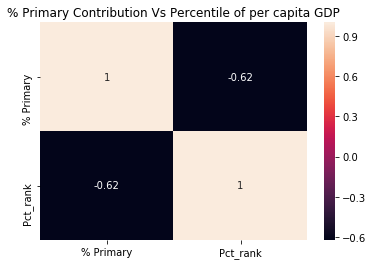

In [90]:
sns.heatmap(cor, annot = True)
plt.title('% Primary Contribution Vs Percentile of per capita GDP')
plt.show()

#### Find correlation of percentile of the state (% of states with lower per capita GDP) and %contribution of Primary sector to total GDP.
Correlation of percentile of the state and %contribution of Primary sector to per capita GDP is negatively correlated. So, there is a possibility that if the GDP of the primary sector may increase, the per capita GDP may go down. So, primary sector growth is not the key factor to increase the per capita GDP. May be industrial growth is required to increase the overall per capita GDP.

### Categorise the states into four groups based on the GDP per capita

In [91]:
q2 = gsva_df['Per Capita GSDP (Rs.)'].quantile(.2)
q5 = gsva_df['Per Capita GSDP (Rs.)'].quantile(.5)
q85 = gsva_df['Per Capita GSDP (Rs.)'].quantile(.85)
q100 = gsva_df['Per Capita GSDP (Rs.)'].quantile(1)

print(q2, q5, q85, q100)

65187.0 104977.0 153246.19999999998 271793.0


In [92]:
def categorize(percapita_gdp):
    if percapita_gdp > q85 and percapita_gdp <= q100:
        return 'C1'
    elif percapita_gdp > q5 and percapita_gdp <= q85:
        return 'C2'
    elif percapita_gdp > q2 and percapita_gdp <= q5:
        return 'C3'
    else:
        return 'C4'

gsva_df['Tag'] = gsva_df['Per Capita GSDP (Rs.)'].apply(categorize)
gsva_df.shape

(27, 43)

In [93]:
#C1 category dataframe
c1 = gsva_df[gsva_df['Tag'] == 'C1']
c1.shape

(4, 43)

In [94]:
#C2 category dataframe
c2 = gsva_df[gsva_df['Tag'] == 'C2']
c2.shape

(9, 43)

In [95]:
#C3 category dataframe
c3 = gsva_df[gsva_df['Tag'] == 'C3']
c3.shape

(8, 43)

In [96]:
#C4 category dataframe
c4 = gsva_df[gsva_df['Tag'] == 'C4']
c4.shape

(6, 43)

In [97]:
sub_sectors = ['Agriculture, forestry and fishing',
              'Mining and quarrying',
              'Manufacturing', 
              'Electricity, gas, water supply & other utility services',
              'Construction', 
              'Trade, repair, hotels and restaurants', 
              'Transport, storage, communication & services related to broadcasting', 
              'Financial services', 
              'Real estate, ownership of dwelling & professional services', 
              'Public administration', 
              'Other services']

In [98]:
# filtering data with sub sectors
c1_sub = c1[sub_sectors]
c1_sub = c1_sub.T

#creating Total column and populating sum of all the columns data for individual row
c1_sub['Total'] = c1_sub.sum(axis = 1)

#finding the total sum from the C1 category GSDP
c1_total = c1['Gross State Domestic Product'].sum()

#populating % contribution of individual sub sector
c1_sub['% Sub Sector Contribution'] = c1_sub['Total'].apply(lambda s: round(100*(s / c1_total),2))

# sorting the % contribution in descending order
c1_sub = c1_sub.sort_values(by='% Sub Sector Contribution', ascending = False)

#creating running sum of % contribution
c1_sub['Cum %'] = c1_sub['% Sub Sector Contribution'].cumsum()

#filtering the rows when cumulative sum is less than 80%
c1_percent_sub = c1_sub.loc[c1_sub['Cum %'] < 80]

#extracting 
c1_percent_sub = c1_percent_sub.reset_index()

In [99]:
c2_sub = c2[sub_sectors]
c2_sub = c2_sub.T
c2_sub['Total'] = c2_sub.sum(axis = 1)

c2_total = c2['Gross State Domestic Product'].sum()

c2_sub['% Sub Sector Contribution'] = c2_sub['Total'].apply(lambda s: round(100*(s / c2_total),2))
c2_sub = c2_sub.sort_values(by='% Sub Sector Contribution', ascending = False)

c2_sub['Cum %'] = c2_sub['% Sub Sector Contribution'].cumsum()

c2_percent_sub = c2_sub.loc[c2_sub['Cum %'] < 80]

c2_percent_sub = c2_percent_sub.reset_index()

In [100]:
c3_sub = c3[sub_sectors]
c3_sub = c3_sub.T
c3_sub['Total'] = c3_sub.sum(axis = 1)

c3_total = c3['Gross State Domestic Product'].sum()

c3_sub['% Sub Sector Contribution'] = c3_sub['Total'].apply(lambda s: round(100*(s / c3_total),2))
c3_sub = c3_sub.sort_values(by='% Sub Sector Contribution', ascending = False)

c3_sub['Cum %'] = c3_sub['% Sub Sector Contribution'].cumsum()

c3_percent_sub = c3_sub.loc[c3_sub['Cum %'] < 80]

c3_percent_sub = c3_percent_sub.reset_index()

In [101]:
c4_sub = c4[sub_sectors]
c4_sub = c4_sub.T
c4_sub['Total'] = c4_sub.sum(axis = 1)

c4_total = c4['Gross State Domestic Product'].sum()

c4_sub['% Sub Sector Contribution'] = c4_sub['Total'].apply(lambda s: round(100*(s / c4_total),2))
c4_sub = c4_sub.sort_values(by='% Sub Sector Contribution', ascending = False)

c4_sub['Cum %'] = c4_sub['% Sub Sector Contribution'].cumsum()

c4_percent_sub = c4_sub.loc[c4_sub['Cum %'] < 80]

c4_percent_sub = c4_percent_sub.reset_index()

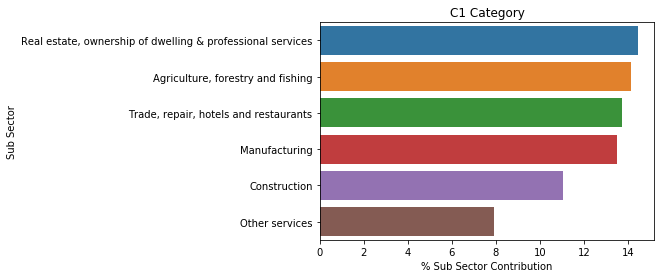

In [102]:
sns.barplot(x = '% Sub Sector Contribution', y = 'index', data = c1_percent_sub)
plt.ylabel('Sub Sector')
plt.title('C1 Category')
plt.show()

#### Top 3/4/5 sub-sectors in C1 category are:
* Trade, repair, hotels and resturants 
* Manufacturing
* Construction

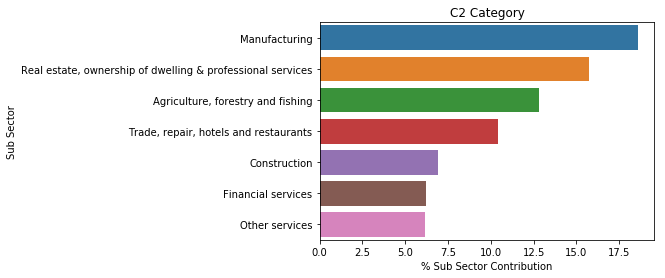

In [103]:
sns.barplot(x = '% Sub Sector Contribution', y = 'index', data = c2_percent_sub)
plt.ylabel('Sub Sector')
plt.title('C2 Category')
plt.show()

#### Top 3/4/5 sub-sectors in C2 category are:
* Agriculture, foirestry and fishing
* Trade, repair, hotels and resturants 
* Construction

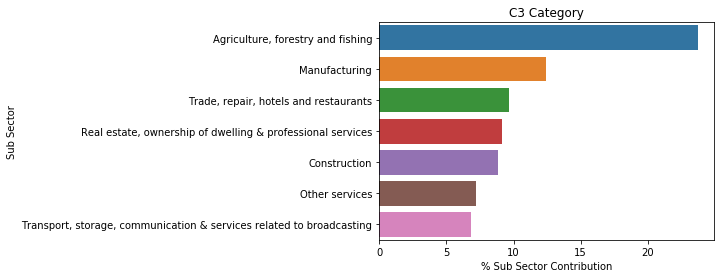

In [104]:
sns.barplot(x = '% Sub Sector Contribution', y = 'index', data = c3_percent_sub)
plt.ylabel('Sub Sector')
plt.title('C3 Category')
plt.show()

#### Top 3/4/5 sub-sectors in C3 category are:
* Trade, repair, hotels and resturants 
* Real estate, ownership of dweling & professional services
* Construction

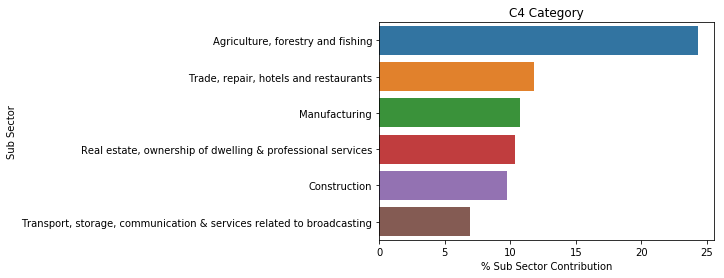

In [105]:
sns.barplot(x = '% Sub Sector Contribution', y = 'index', data = c4_percent_sub)
plt.ylabel('Sub Sector')
plt.title('C4 Category')
plt.show()

#### Top 3/4/5 sub-sectors in C4 category are:
* Manufacturing
* Real estate, ownership of dweling & professional services
* Construction

In [106]:
c1c2 = round(100*(c1_total / c2_total))
c1c3 = round(100*(c1_total / c3_total))
c1c4 = round(100*(c1_total / c4_total))

print('GDP distribution of C1 is only {0}% of the C2 category'.format(c1c2))
print('GDP distribution of C1 is only {0}% of the C3 category'.format(c1c3))
print('GDP distribution of C1 is only {0}% of the C4 category'.format(c1c4))

GDP distribution of C1 is only 17.0% of the C2 category
GDP distribution of C1 is only 57.0% of the C3 category
GDP distribution of C1 is only 44.0% of the C4 category


#### How does the GDP distribution of the top states (C1) differ from the others?
Total GDP of C1 category is `101930677` and C2 category has `586380452` which higher than C1. Also, C3 category has total GDP of `177966387` which is very higher than C1 and same for C4 category which has total GDP of `233252066`.

In [107]:
#adding 'Gross State Domestic Product' to the sub_sector list to filter Categories (C1/C2/C3/C4) columns
# to find out correlation with GSDP
#sub_sectors.append('Gross State Domestic Product')
filter_col = ['Agriculture, forestry and fishing','Mining and quarrying','Manufacturing', 'Electricity, gas, water supply & other utility services',
              'Construction', 'Trade, repair, hotels and restaurants', 'Transport, storage, communication & services related to broadcasting', 
              'Financial services', 'Real estate, ownership of dwelling & professional services','Public administration', 
              'Other services', 'Gross State Domestic Product']

In [108]:
c1_sub_gdp = c1[filter_col]
# creating correlation matrix of C1 sub sectors with GSDP
c1_cor = c1_sub_gdp.corr()

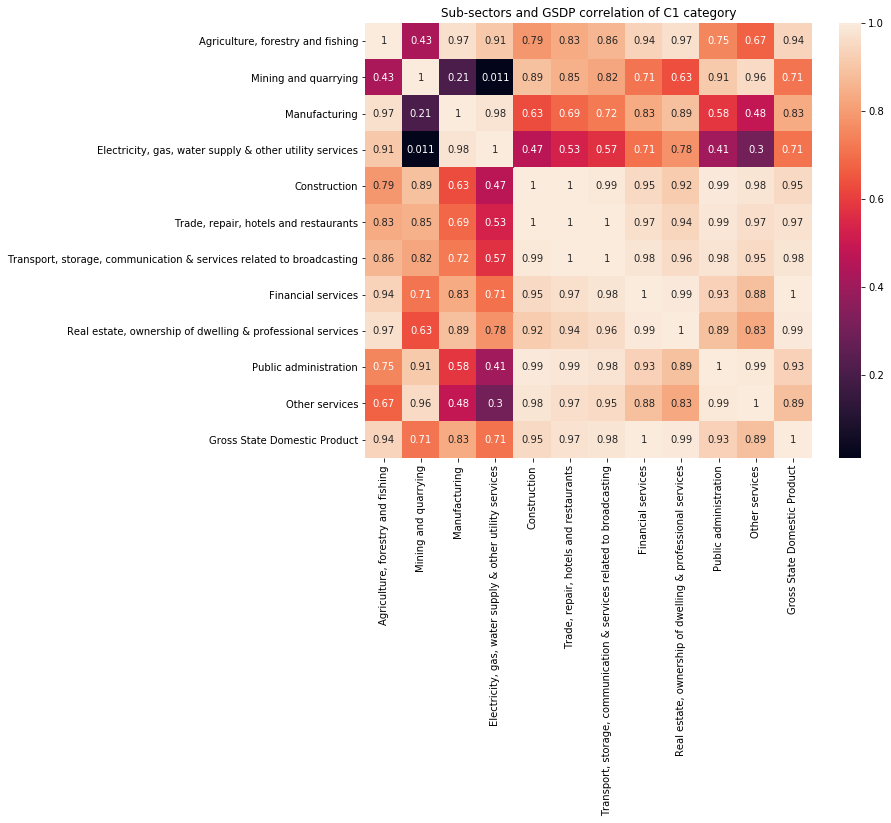

In [109]:
plt.figure(figsize = (10,8))
sns.heatmap(c1_cor, annot = True)
plt.title('Sub-sectors and GSDP correlation of C1 category')
plt.show()

In [110]:
c2_sub_gdp = c2[filter_col]
# creating correlation matrix of C2 sub sectors with GSDP
c2_cor = c2_sub_gdp.corr()

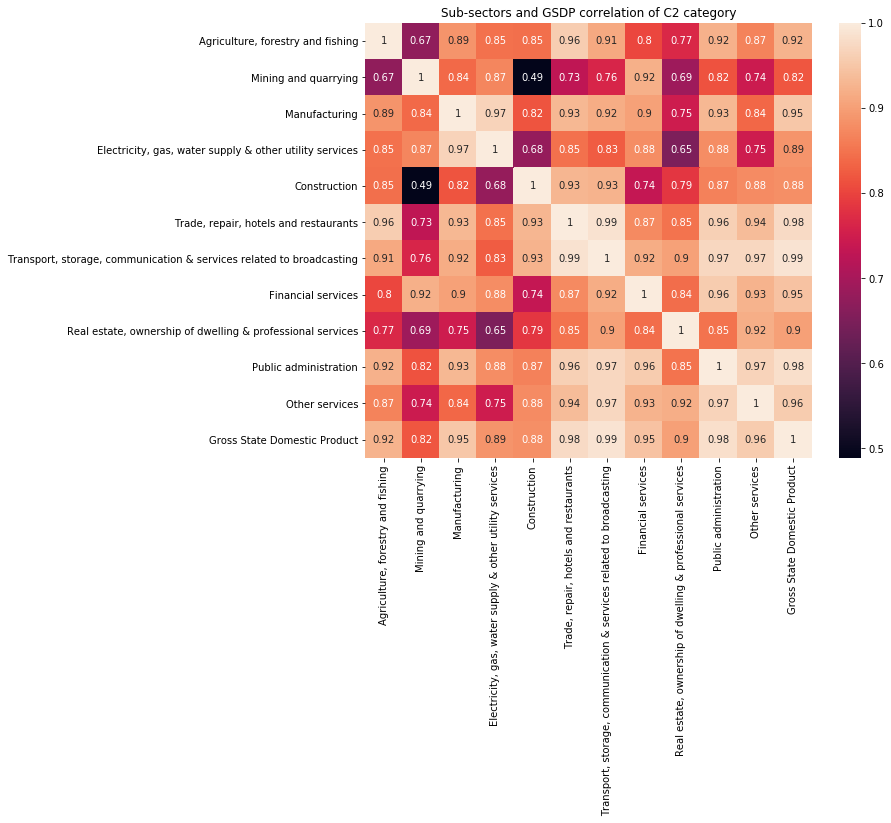

In [111]:
plt.figure(figsize = (10,8))
sns.heatmap(c2_cor, annot = True)
plt.title('Sub-sectors and GSDP correlation of C2 category')
plt.show()

In [112]:
c3_sub_gdp = c3[filter_col]
# creating correlation matrix of C3 sub sectors with GSDP
c3_cor = c3_sub_gdp.corr()

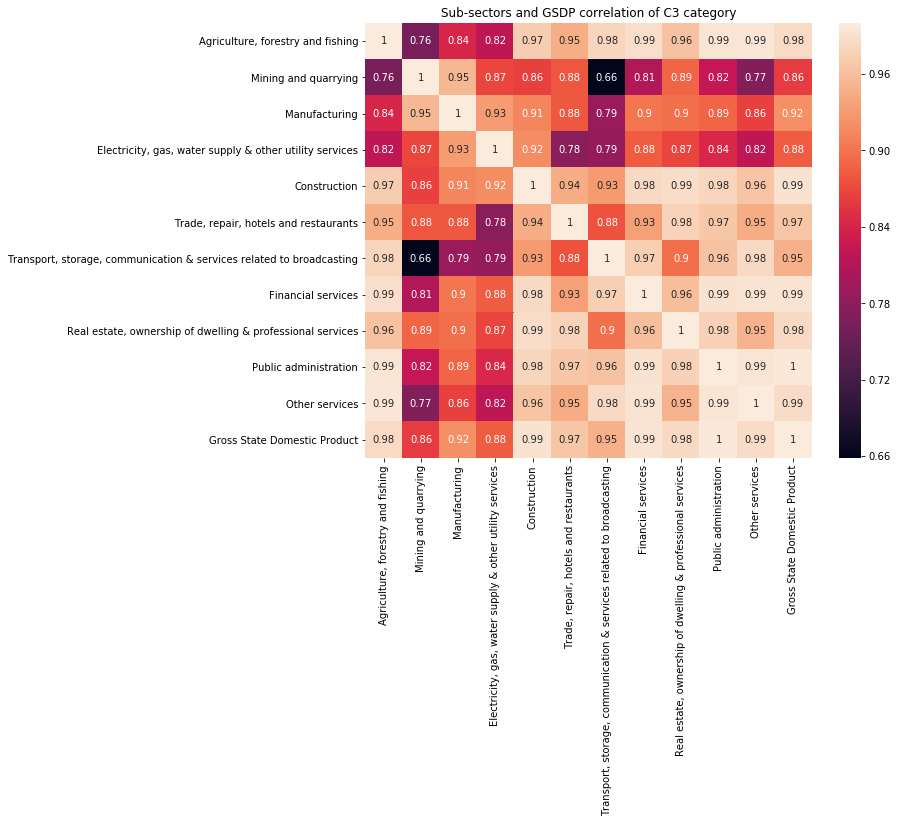

In [113]:
plt.figure(figsize = (10,8))
sns.heatmap(c3_cor, annot = True)
plt.title('Sub-sectors and GSDP correlation of C3 category')
plt.show()

In [114]:
c4_sub_gdp = c4[filter_col]
# creating correlation matrix of C4 sub sectors with GSDP
c4_cor = c4_sub_gdp.corr()

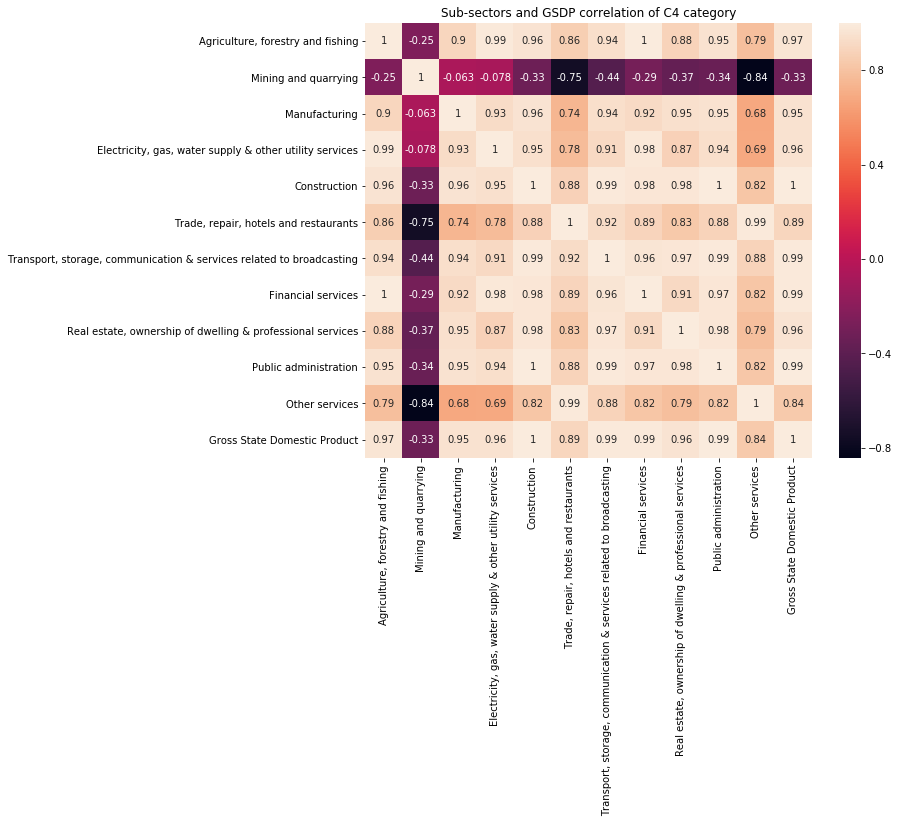

In [115]:
plt.figure(figsize = (10,8))
sns.heatmap(c4_cor, annot = True)
plt.title('Sub-sectors and GSDP correlation of C4 category')
plt.show()

#### Which sub-sectors seem to be correlated with high GDP?
* C1 - Category
    * Financial Services, 
    * Real estate, ownership of dwelling & professional services, 
    * Construction
    * Agriculture, forestry and fishing, 
    * Trade, repair, hotels and restaurants 
    * Transport, storage, communication & services related to broadcasting
* C2 - Category
    * Transport, storage, communication & services related to broadcasting
    * Trade, repair, hotels and restaurants
    * Manufacturing
    * Financial services
    * Public administration
    * Agriculture, forestry and fishing
* C3 - Category
    * Financial services
    * Real estate, ownership of dwelling & professional services
    * Agriculture, forestry and fishing
    * Construction
    * Trade, repair, hotels and restaurants
    * Transport, storage, communication & services related to broadcasting
* C4 - Category
    * Transport, storage, communication & services related to broadcasting
    * Financial services
    * Agriculture, forestry and fishing
    * Real estate, ownership of dwelling & professional services
    * Public administration 
    
#### Which sub-sectors do the various categories need to focus on? 
Transport, storage, communication & services related broadcasting, Other services, Financial Sercvices need to focus on the various category.

#### Two recommendations for each category to improve the per capita GDP.
Following sub-sectors need to be focused as these are contributing to the top 80% of the GDP in each category.
* C1 - 
    * Construction and Other services need to be focused.
    * Financial service is highly correlated with GDP. we should focus on financial service.
      
* C2 - 
    * Financial Services and Other Services need to be focused.
    * Mining and quaring and construction should be correlated, need to investigate why it is not happening.
* C3 - 
    * Other Services and Transport, storage, communication & services related to broadcasting need to be focused.
    * Mining and quaring and Transport should be correlated buyt should less correlation. Investigation required.
* C4 - 
    * Construction and Transport, storage, communication & services related to broadcasting need to be focused. Construction is highly correlated with GDP
    * Mining and quaring is negatively correlated with all other sub sector. Need to do some investigation.

# Part-II: GDP and Education Dropout Rates

In [116]:
dropout_df = pd.read_csv('./data/rs_session243_au570_1.1.csv')

#renaming the columns
dropout = dropout_df.rename(columns = {'Level of Education - State' : 'State', 
                                       'Primary - 2014-2015' : 'Primary - 2013-2014', 
                                       'Primary - 2014-2015.1' : 'Primary - 2014-2015'})

#dropping unnessery columns
dropout = dropout.drop(['Sl. No.','Senior Secondary - 2012-2013','Senior Secondary - 2013-2014', 'Senior Secondary - 2014-2015'], axis = 1)
dropout = dropout.set_index('State')

#changing index name to match with GDP per capita dataframe
dropout.rename(index = {"Chhatisgarh": "Chhattisgarh", "Uttrakhand":"Uttarakhand"}, inplace = True)
dropout = dropout.reset_index()

In [117]:
dropout.head()

,State,Primary - 2012-2013,Primary - 2013-2014,Primary - 2014-2015,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015
0,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87
1,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71
2,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11
3,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06
4,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90


In [118]:
#merging GDP per capita dataframe with dropout data frame
gsva_dropout = pd.merge(gsva_df, dropout, how='inner', on = 'State')
gsva_dropout.head()

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Tag,Primary - 2012-2013,Primary - 2013-2014,Primary - 2014-2015,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015
0,14819416.0,7893514.0,4309078.0,346160.0,2270664.0,1484300.0,16303716.0,4672266.0,1151729.0,4664889.0,...,C3,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71
1,686117.0,415520.0,38387.0,224017.0,8193.0,30842.0,716959.0,26120.0,113527.0,147842.0,...,C2,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11
2,3855548.0,2890544.0,173478.0,261987.0,529539.0,1471149.0,5326697.0,2002936.0,296587.0,1733568.0,...,C4,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06
3,7951890.0,4688237.0,2060296.0,550132.0,653224.0,68107.0,8019997.0,2189965.0,345168.0,3449763.0,...,C4,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90
4,3948847.0,2613371.0,352208.0,597785.0,385483.0,2451970.0,6400817.0,4370593.0,1198438.0,2669855.0,...,C3,4.14,1.42,2.91,5.42,3.80,5.85,14.86,23.41,21.26


In [119]:
#extracting the dropout rates columns and GDP per capita columns for correlation analisys
dropout_gdpper_capita = gsva_dropout[['Per Capita GSDP (Rs.)','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]
dropout_gdpper_capita.head()

,Per Capita GSDP (Rs.),Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,104977.0,6.72,5.20,15.71
1,112718.0,10.82,6.71,17.11
2,60621.0,15.36,10.51,27.06
3,33954.0,NaN,4.08,25.90
4,86860.0,2.91,5.85,21.26


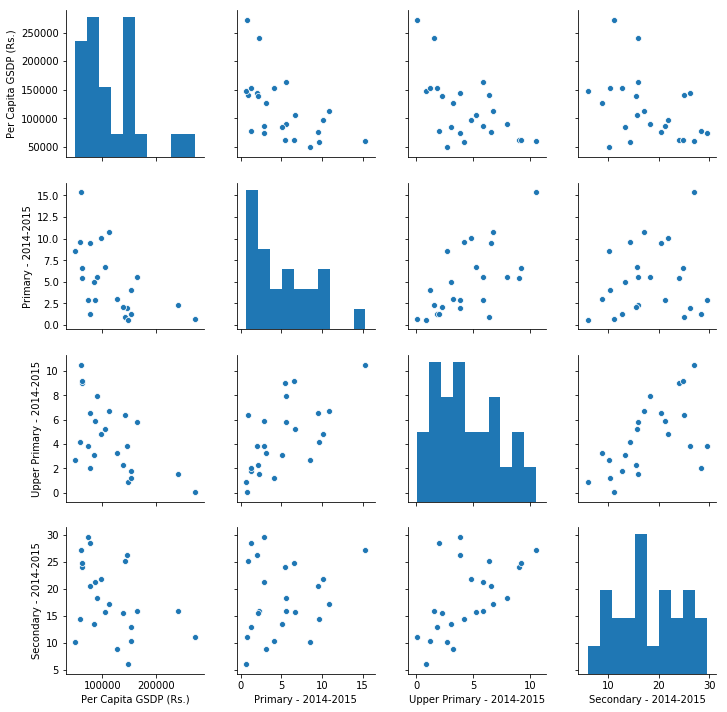

In [120]:
#pair plot for the dropout rate and per capita GDP
sns.pairplot(dropout_gdpper_capita.dropna())
plt.show()

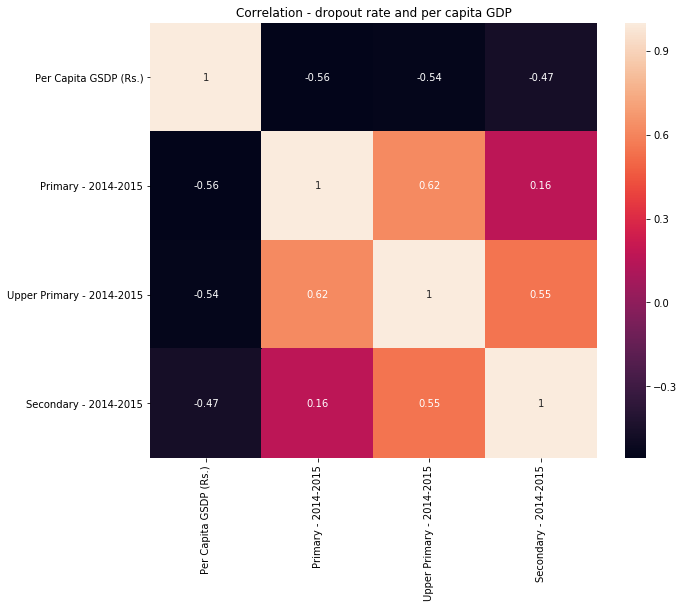

In [121]:
#correlation matrix dropout rate and per capita GDP
dropout_gdpper_capita_cor = dropout_gdpper_capita.corr()

plt.figure(figsize = (10,8))
sns.heatmap(dropout_gdpper_capita_cor, annot = True)
plt.title('Correlation - dropout rate and per capita GDP')
plt.show()

#### Analysis
Form the scatter plot and heatmap, we can see that the per caipta GDP is negatively correlated with primary, upper primary and secondary dropout. There might be chance that if per capita GDP increase, then primary, upper primary and secondary students will be able to continue with their education. Hence, dropout rate will decrease.

In [122]:
primary_contribution = gsva_dropout[['Primary - 2014-2015', '% Primary', '% Secondary','% Tertiary']]
primary_cor = primary_contribution.corr()
primary_cor

,Primary - 2014-2015,% Primary,% Secondary,% Tertiary
Primary - 2014-2015,1.000000,0.436478,-0.443622,0.254515
% Primary,0.436478,1.000000,-0.602787,-0.124280
% Secondary,-0.443622,-0.602787,1.000000,-0.679940
% Tertiary,0.254515,-0.124280,-0.679940,1.000000


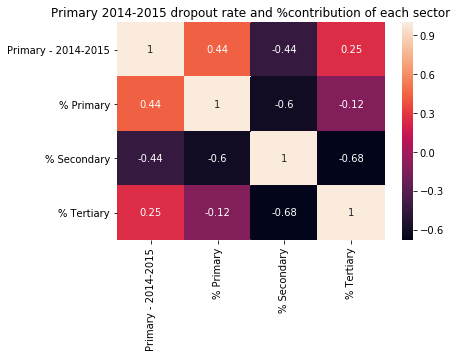

In [123]:
sns.heatmap(primary_cor, annot = True)
plt.title('Primary 2014-2015 dropout rate and %contribution of each sector')
plt.show()

In [124]:
upper_primary_contribution = gsva_dropout[['Upper Primary - 2014-2015', '% Primary', '% Secondary','% Tertiary']]
upper_primary_cor = upper_primary_contribution.corr()
upper_primary_cor

,Upper Primary - 2014-2015,% Primary,% Secondary,% Tertiary
Upper Primary - 2014-2015,1.000000,0.569170,-0.392139,-0.04621
% Primary,0.569170,1.000000,-0.602787,-0.12428
% Secondary,-0.392139,-0.602787,1.000000,-0.67994
% Tertiary,-0.046210,-0.124280,-0.679940,1.00000


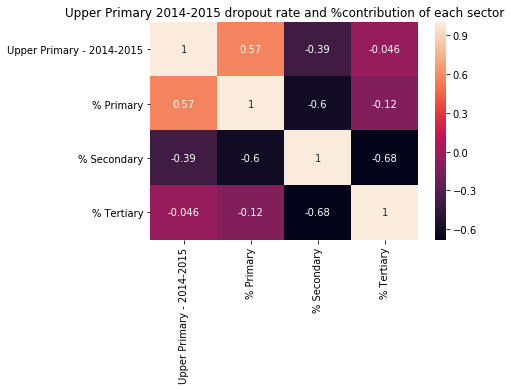

In [125]:
sns.heatmap(upper_primary_cor, annot = True)
plt.title('Upper Primary 2014-2015 dropout rate and %contribution of each sector')
plt.show()

In [126]:
secondary_contribution = gsva_dropout[['Secondary - 2014-2015', '% Primary', '% Secondary','% Tertiary']]
secondary_cor = secondary_contribution.corr()
secondary_cor

,Secondary - 2014-2015,% Primary,% Secondary,% Tertiary
Secondary - 2014-2015,1.000000,0.375442,-0.271515,0.00942
% Primary,0.375442,1.000000,-0.602787,-0.12428
% Secondary,-0.271515,-0.602787,1.000000,-0.67994
% Tertiary,0.009420,-0.124280,-0.679940,1.00000


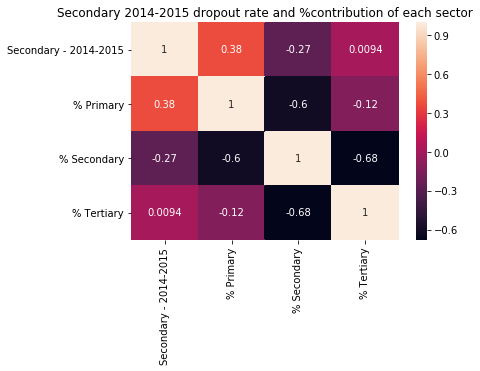

In [127]:
sns.heatmap(secondary_cor, annot = True)
plt.title('Secondary 2014-2015 dropout rate and %contribution of each sector')
plt.show()

#### Is there any correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) to the total GDP?
* Primary, upper primary and secondary education dropout rate is moderatly correlated with primary sector GDP. There might be chances that primary school dropouts are contributing to the primary sector at certain point of time in their life.
* But the Primary, upper primary and secondary education dropout rate is negatively correlated with secondary sector GDP contribution. So, there is a chance that because of the drop out rates, seconday sector may be getting adversly affected and people are may be contributing in the primary sector.
* Primary educaton drop out rate is rarely correlated with tertiary sector and can be neglected for upper primary and secondary education dropout.


In [128]:
dropout_population = gsva_dropout[['Primary - 2014-2015', 'Upper Primary - 2014-2015', 'Secondary - 2014-2015', 'Population (\'00)']]
dropout_population.head()

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Population ('00)
0,6.72,5.20,15.71,501510.0
1,10.82,6.71,17.11,14870.0
2,15.36,10.51,27.06,326780.0
3,NaN,4.08,25.90,1101240.0
4,2.91,5.85,21.26,270530.0


In [129]:
dropout_population_cor = dropout_population.corr()
dropout_population_cor

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Population ('00)
Primary - 2014-2015,1.000000,0.623220,0.164026,-0.000191
Upper Primary - 2014-2015,0.623220,1.000000,0.549114,-0.049800
Secondary - 2014-2015,0.164026,0.549114,1.000000,-0.058377
Population ('00),-0.000191,-0.049800,-0.058377,1.000000


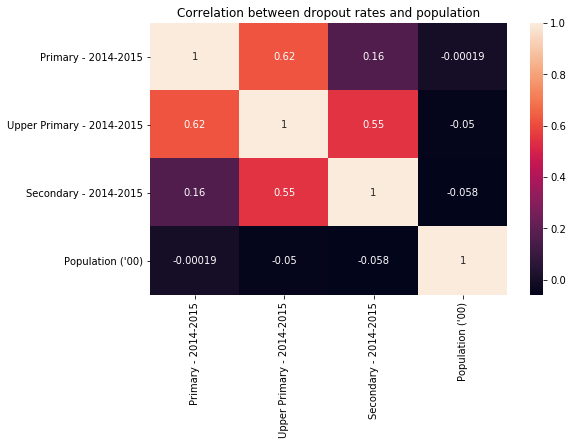

In [130]:
plt.figure(figsize = (8,5))
sns.heatmap(dropout_population_cor, annot = True)
plt.title('Correlation between dropout rates and population')
plt.show()

#### Is there any correlation between dropout rates and population? What is the expected trend and what is the observation?
Dropout rates and population are negatively correlated. However, population has very less effet in the dropout rates though and the correlation can be neglected.

The expected trend is the dropout rate should increase with the population but the observation is opposite. Population has almost no effect in the dropout of the primary education. There are little negative effect in upper primary and secondary drop out rates but can be neglected.

#### Write down the key insights you draw from this data:
If per capita GDP increases then the dropout rate will decrease in the education. People will have money to send their childern to school. This will increase the secondary sector's GDP but wont affect the highly skilled labor sector. But it will affect the primary sector adversly. 

#### Form at least one reasonable hypothesis for the observations from the data
If the dropout rate of the primary education reduces then the GDP of the secondary sector will increase.